In [1]:
from PIL import Image
import numpy as np
import glob
import os
import matplotlib.pyplot as plt


In [2]:
import tensorflow as tf
import keras
print('TF', tf.__version__ )
print('KERAS', keras.__version__ )


TF 1.10.0
KERAS 2.2.2


Using TensorFlow backend.


In [3]:
#!pip install  --upgrade --ignore-installed tensorflow


In [5]:
files = glob.glob('img/*.jpg')
files.sort()
print(files)

['img/01_d.jpg', 'img/01_f.jpg', 'img/01_l.jpg', 'img/01_r.jpg', 'img/01_u.jpg', 'img/02_d.jpg', 'img/02_f.jpg', 'img/02_l.jpg', 'img/02_r.jpg', 'img/02_u.jpg', 'img/03_d.jpg', 'img/03_f.jpg', 'img/03_l.jpg', 'img/03_r.jpg', 'img/03_u.jpg', 'img/04_d.jpg', 'img/04_f.jpg', 'img/04_l.jpg', 'img/04_r.jpg', 'img/04_u.jpg', 'img/05_d.jpg', 'img/05_f.jpg', 'img/05_l.jpg', 'img/05_r.jpg', 'img/05_u.jpg', 'img/06_d.jpg', 'img/06_f.jpg', 'img/06_l.jpg', 'img/06_r.jpg', 'img/06_u.jpg', 'img/07_d.jpg', 'img/07_f.jpg', 'img/07_l.jpg', 'img/07_r.jpg', 'img/07_u.jpg', 'img/08_d.jpg', 'img/08_f.jpg', 'img/08_l.jpg', 'img/08_r.jpg', 'img/08_u.jpg', 'img/09_d.jpg', 'img/09_f.jpg', 'img/09_l.jpg', 'img/09_r.jpg', 'img/09_u.jpg', 'img/10_d.jpg', 'img/10_f.jpg', 'img/10_l.jpg', 'img/10_r.jpg', 'img/10_u.jpg']


In [6]:
bnames = [os.path.basename(f)  for f in files]
print(bnames)


['01_d.jpg', '01_f.jpg', '01_l.jpg', '01_r.jpg', '01_u.jpg', '02_d.jpg', '02_f.jpg', '02_l.jpg', '02_r.jpg', '02_u.jpg', '03_d.jpg', '03_f.jpg', '03_l.jpg', '03_r.jpg', '03_u.jpg', '04_d.jpg', '04_f.jpg', '04_l.jpg', '04_r.jpg', '04_u.jpg', '05_d.jpg', '05_f.jpg', '05_l.jpg', '05_r.jpg', '05_u.jpg', '06_d.jpg', '06_f.jpg', '06_l.jpg', '06_r.jpg', '06_u.jpg', '07_d.jpg', '07_f.jpg', '07_l.jpg', '07_r.jpg', '07_u.jpg', '08_d.jpg', '08_f.jpg', '08_l.jpg', '08_r.jpg', '08_u.jpg', '09_d.jpg', '09_f.jpg', '09_l.jpg', '09_r.jpg', '09_u.jpg', '10_d.jpg', '10_f.jpg', '10_l.jpg', '10_r.jpg', '10_u.jpg']


In [8]:
img = Image.open(files[0])
print(img, img.size)
imgarr = np.array(img, dtype='float32')
print(imgarr.shape)



<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=100x100 at 0x7F844D2429E8> (100, 100)
(100, 100, 3)


In [9]:
img = img.convert('L') # gray
print(img, img.size)
imgarr = np.asarray(img, dtype='float32')
print(imgarr.shape)

<PIL.Image.Image image mode=L size=100x100 at 0x7F844D2428D0> (100, 100)
(100, 100)


In [11]:
def get_index_and_view_of_img(imgname):
    imgname = imgname.replace('.jpg', '')
    index, view = imgname.split('_')
    return index, view


In [13]:
training = []
test = []
for f in files:
    bname = os.path.basename(f)
    index, view = get_index_and_view_of_img(bname)
    print(f, bname, index, view)
    if view in ['f']:
        training.append((f, int(index)))
    elif view in ['u', 'd']:
        test.append((f, int(index)))

img/01_d.jpg 01_d.jpg 01 d
img/01_f.jpg 01_f.jpg 01 f
img/01_l.jpg 01_l.jpg 01 l
img/01_r.jpg 01_r.jpg 01 r
img/01_u.jpg 01_u.jpg 01 u
img/02_d.jpg 02_d.jpg 02 d
img/02_f.jpg 02_f.jpg 02 f
img/02_l.jpg 02_l.jpg 02 l
img/02_r.jpg 02_r.jpg 02 r
img/02_u.jpg 02_u.jpg 02 u
img/03_d.jpg 03_d.jpg 03 d
img/03_f.jpg 03_f.jpg 03 f
img/03_l.jpg 03_l.jpg 03 l
img/03_r.jpg 03_r.jpg 03 r
img/03_u.jpg 03_u.jpg 03 u
img/04_d.jpg 04_d.jpg 04 d
img/04_f.jpg 04_f.jpg 04 f
img/04_l.jpg 04_l.jpg 04 l
img/04_r.jpg 04_r.jpg 04 r
img/04_u.jpg 04_u.jpg 04 u
img/05_d.jpg 05_d.jpg 05 d
img/05_f.jpg 05_f.jpg 05 f
img/05_l.jpg 05_l.jpg 05 l
img/05_r.jpg 05_r.jpg 05 r
img/05_u.jpg 05_u.jpg 05 u
img/06_d.jpg 06_d.jpg 06 d
img/06_f.jpg 06_f.jpg 06 f
img/06_l.jpg 06_l.jpg 06 l
img/06_r.jpg 06_r.jpg 06 r
img/06_u.jpg 06_u.jpg 06 u
img/07_d.jpg 07_d.jpg 07 d
img/07_f.jpg 07_f.jpg 07 f
img/07_l.jpg 07_l.jpg 07 l
img/07_r.jpg 07_r.jpg 07 r
img/07_u.jpg 07_u.jpg 07 u
img/08_d.jpg 08_d.jpg 08 d
img/08_f.jpg 08_f.jpg 08 f
i

In [14]:
print(len(training))
print(len(test))

10
20


In [15]:
print(training[0], training[-1])
print(test[0], test[-1])


('img/01_f.jpg', 1) ('img/10_f.jpg', 10)
('img/01_d.jpg', 1) ('img/10_u.jpg', 10)


In [19]:
# one-hot encoding
def onehot(value, total):
    encoding = [1 if i == value else 0 for i in range(total)]
    return encoding

# 여러 이미지 출력. 28x28 크기
def draw_digits(imgdata, imgshape=(100, 100)):
    num_imgs = imgdata.shape[0]
    fig, ax = plt.subplots(1, num_imgs, figsize=(num_imgs, 1))
    for i in range(num_imgs):
        ax[i].set_axis_off()
        ax[i].imshow(np.reshape(imgdata[i], imgshape))
    plt.show()

In [25]:
def load_img_files(filelist, limit=0):
    imgarrlist = []
    for i,f in enumerate(filelist):
        if limit > 0 and i >= limit: # 최대 개수
            break            
        img = Image.open(f)
        img = img.convert('L') # gray
        #print('PIL', img.size)
        imgarr = np.array(img, dtype='float32')
        imgarr = imgarr / 255.0
        #print('NP', imgarr.shape)
        imgarrlist.append(imgarr)
    merged = np.vstack(imgarrlist)
    # 모든 이미지가 동일 크기라고 가정함.
    #merged = merged.reXXXX((len(imgarrlist), *imgarr.shape)) 
    merged = merged.reshape((len(imgarrlist), 100, 100)) 
    print('merged SHAPE', merged.shape)
    return merged

In [26]:
trainingX = load_img_files([f[0] for f in training])
trainingY = np.array([onehot(f[1], 11) for f in training])
#print(trainingX)
print(trainingY)

merged SHAPE (10, 100, 100)
[[0 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 1]]


In [37]:
testX = load_img_files([f[0] for f in test])
testY = np.array([onehot(f[1], 11) for f in test])
#print(testX)
print(testY)

merged SHAPE (20, 100, 100)
[[0 1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 1]]


In [28]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten
width = 100
height = 100
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',
                 padding='same',  # 'valid', 'same'
                 input_shape=(width, height, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu',
                padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(11, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
for layer in model.layers:
    print('IN', layer.input_shape, 'OUT', layer.output_shape)

#print(model.layers[0].get_weights())


IN (None, 100, 100, 1) OUT (None, 100, 100, 32)
IN (None, 100, 100, 32) OUT (None, 50, 50, 32)
IN (None, 50, 50, 32) OUT (None, 50, 50, 64)
IN (None, 50, 50, 64) OUT (None, 25, 25, 64)
IN (None, 25, 25, 64) OUT (None, 40000)
IN (None, 40000) OUT (None, 64)
IN (None, 64) OUT (None, 11)


In [33]:
# 4. 모델 학습시키기
hist = model.fit(trainingX.reshape((-1, width, height, 1)), 
                 trainingY, 
                 epochs=40, batch_size=10, shuffle=True)


Epoch 1/40
10/10 [==============================] - 0s 19ms/step - loss: 4.8432e-05 - acc: 1.0000
Epoch 2/40
10/10 [==============================] - 0s 20ms/step - loss: 4.3907e-05 - acc: 1.0000
Epoch 3/40
10/10 [==============================] - 0s 18ms/step - loss: 4.0665e-05 - acc: 1.0000
Epoch 4/40
10/10 [==============================] - 0s 19ms/step - loss: 3.8346e-05 - acc: 1.0000
Epoch 5/40
10/10 [==============================] - 0s 20ms/step - loss: 3.6635e-05 - acc: 1.0000
Epoch 6/40
10/10 [==============================] - 0s 17ms/step - loss: 3.5336e-05 - acc: 1.0000
Epoch 7/40
10/10 [==============================] - 0s 18ms/step - loss: 3.4287e-05 - acc: 1.0000
Epoch 8/40
10/10 [==============================] - 0s 18ms/step - loss: 3.3405e-05 - acc: 1.0000
Epoch 9/40
10/10 [==============================] - 0s 18ms/step - loss: 3.2558e-05 - acc: 1.0000
Epoch 10/40
10/10 [==============================] - 0s 20ms/step - loss: 3.1736e-05 - acc: 1.0000
Epoch 11/40
10/10 [

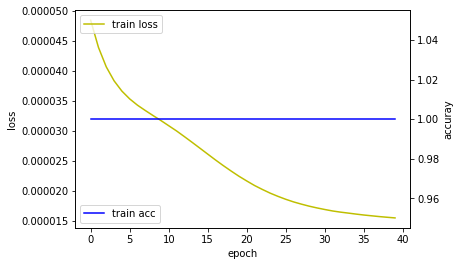

In [34]:
# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
#loss_ax.set_ylim([0.0, 0.5])
acc_ax.plot(hist.history['acc'], 'b', label='train acc')
#acc_ax.set_ylim([0.8, 1.0])
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()


In [38]:
# 7. 모델 사용하기
Ypr = model.predict(testX.reshape((-1, width, height, 1)))
#draw_digits(X_te)
# 예측 결과 보기
print('정답', np.argmax(testY, axis=1))
print('예측', np.argmax(Ypr, axis=1))
cmp = np.argmax(testY, axis=1) - np.argmax(Ypr, axis=1)
#print(cmp)
correct = cmp == 0
#print(correct)
acc = correct.sum()
ratio = float(acc) / len(testY) * 100
print('정확도 [%d/%d] %.1f %%' % (acc, len(testY), ratio))

정답 [ 1  1  2  2  3  3  4  4  5  5  6  6  7  7  8  8  9  9 10 10]
예측 [ 1  1  2  1  3  6  4  1  5  5  6  6  7  7  8  7  9  7 10 10]
정확도 [15/20] 75.0 %


In [39]:
for f, y, y2 in zip(test, testY, Ypr):
    #print(f, y, y2, np.argmax(y) == np.argmax(y2))
    print(f, y, ['%.3f' % v for v in y2], np.argmax(y) == np.argmax(y2))

('img/01_d.jpg', 1) [0 1 0 0 0 0 0 0 0 0 0] ['0.000', '1.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000'] True
('img/01_u.jpg', 1) [0 1 0 0 0 0 0 0 0 0 0] ['0.000', '1.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000'] True
('img/02_d.jpg', 2) [0 0 1 0 0 0 0 0 0 0 0] ['0.000', '0.000', '0.998', '0.000', '0.000', '0.002', '0.000', '0.000', '0.000', '0.000', '0.000'] True
('img/02_u.jpg', 2) [0 0 1 0 0 0 0 0 0 0 0] ['0.000', '1.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000'] False
('img/03_d.jpg', 3) [0 0 0 1 0 0 0 0 0 0 0] ['0.000', '0.000', '0.000', '1.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000'] True
('img/03_u.jpg', 3) [0 0 0 1 0 0 0 0 0 0 0] ['0.000', '0.000', '0.000', '0.138', '0.000', '0.225', '0.622', '0.014', '0.000', '0.000', '0.000'] False
('img/04_d.jpg', 4) [0 0 0 0 1 0 0 0 0 0 0] ['0.000', '0.000', '0.000', '0.000', '1.000', '0.000', '0.00